# Statistical Data Visualization (Seaborn) - Distribution

      An early step in any effort to analyze or model data should be to understand how the variables are distributed.
      Techniques for distribution visualization can provide quick answers to many important questions. What range do the observations cover?
      What is their central tendency? Are they heavily skewed in one direction? Is there evidence for bimodality? Are there significant outliers?
      Do the answers to these questions vary across subsets defined by other variables?

In [ ]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pdb

## Distribution Plots | .displot()

In [ ]:
# Dataset

penguins = sns.load_dataset("penguins")
tips = sns.load_dataset("tips")

penguins.head()
# tips.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


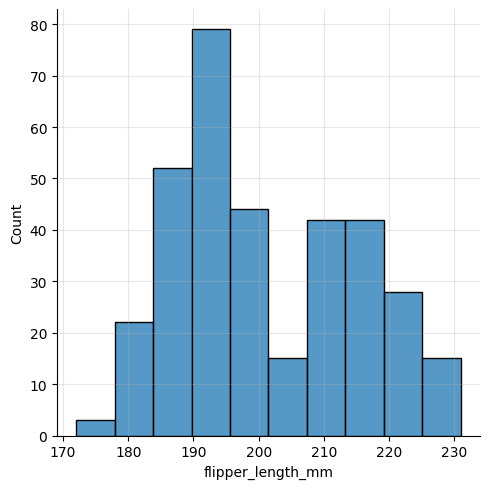

In [ ]:
# Displot()

sns.displot(penguins, x = "flipper_length_mm")
plt.grid(alpha = 0.3)

# binwidth (int)
# bins (int)
# discrete (bool)

## Conditioning on other variables

      Once you understand the distribution of a variable, the next step is often to ask whether features of that distribution
      differ across other variables in the dataset.

Text(0.5, 1.05, 'Penguins')

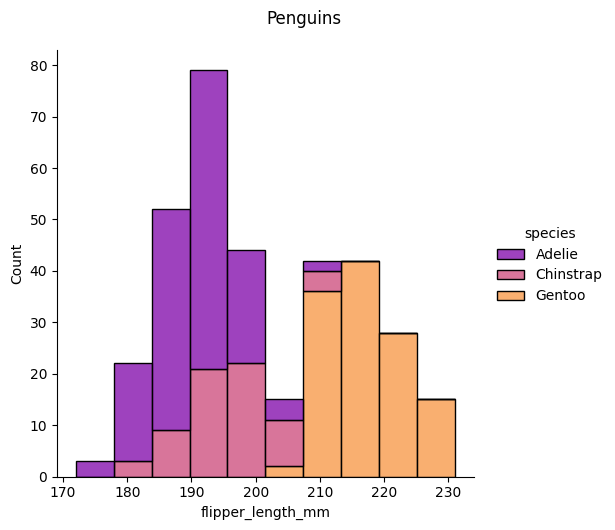

In [ ]:
# Can also use a hue, element, multiple

g = sns.displot(penguins, x = "flipper_length_mm", hue = "species", palette = 'plasma', multiple = 'stack')

g.fig.suptitle('Penguins', y = 1.05)

# element (step)
# multiple (stack, dodge)

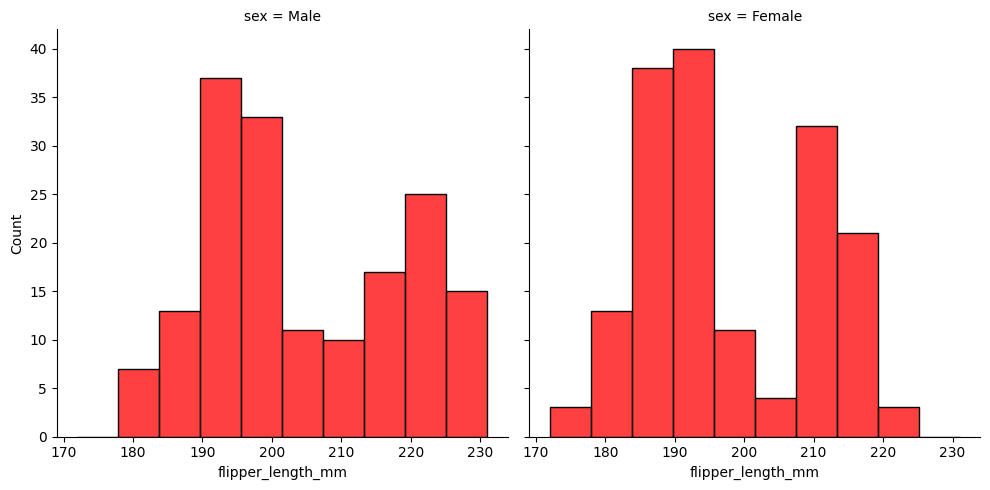

In [ ]:
# Each distribution with col

# Define custom colors for each 'sex' value
custom_colors = {"Male": "blue", "Female": "orange"}

sns.displot(penguins, x = "flipper_length_mm", col = "sex", bins = 10, color = 'red')

## Normalized histogram statistics

    When the subsets have unequal numbers of observations, comparing their distributions in terms of counts may not be ideal.
    One solution is to normalize the counts using the stat parameter:

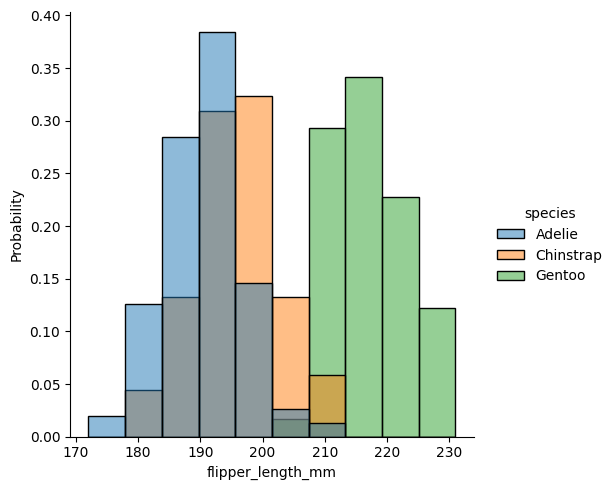

In [ ]:
# Create a grid of subplots (2 rows x 2 columns)

sns.displot(penguins, x = "flipper_length_mm", hue = "species", stat = "probability", common_norm = False)

# stat (probability)
# normalized independently, common_norm (False)

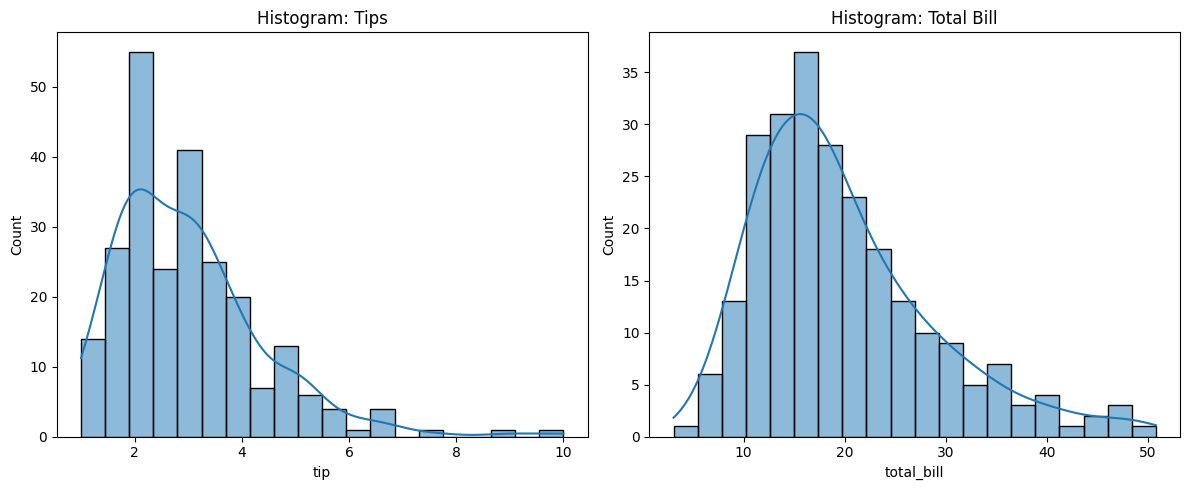

In [ ]:
# Displots cannot be subplotted but .histplot() can be

plt.figure(figsize = (12, 5))

# Create the first subplot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, position 1
sns.histplot(data = tips, x = "tip", bins = 20, kde = True)
plt.title("Histogram: Tips")

# Create the second subplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, position 2
sns.histplot(data=tips, x="total_bill", bins = 20, kde = True)
plt.title("Histogram: Total Bill")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## Kernel density estimation

      A histogram aims to approximate the underlying probability density function that generated the data by binning and counting observations.
      Kernel density estimation (KDE) presents a different solution to the same problem.
      Rather than using discrete bins, a KDE plot smooths the observations with a Gaussian kernel, producing a continuous density estimate:

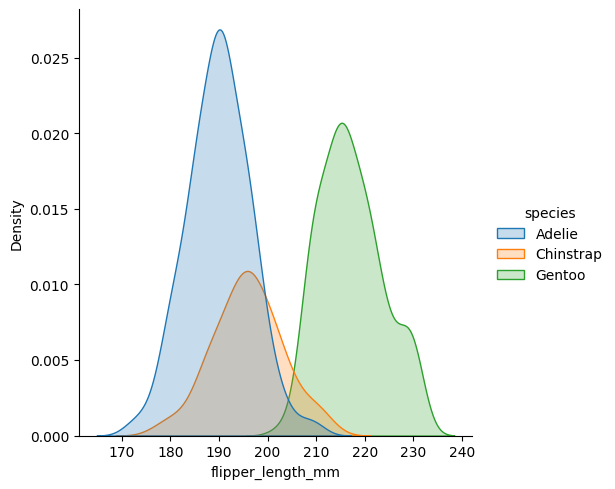

In [ ]:
# KDE

sns.displot(penguins, x = "flipper_length_mm", kind = "kde", hue = 'species', fill = True)

# hue
# smoothing - bw_adjust (float)
# multiple (stack)
# fill (bool)

## Empirical cumulative distributions (ecdf)

      A third option for visualizing distributions computes the “empirical cumulative distribution function” (ECDF).
      This plot draws a monotonically-increasing curve through each datapoint such that the height of the curve reflects the proportion of
      observations with a smaller value

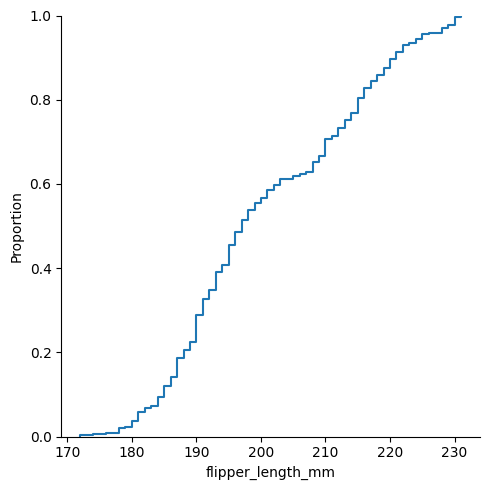

In [ ]:
sns.displot(penguins, x = "flipper_length_mm", kind = "ecdf")